# 综合项目实战_Python数据分析：豆瓣电影分析系统
# ——基于爬虫、Panads、MatplotLib、PyEcharts 等技术实现

## 一、数据收集

### 1.1、利用爬虫获取豆瓣电影TOP250电影数据

from bs4 import BeautifulSoup
import random
from  urllib import request
import time
import re
import csv

#使用代理ip和模拟浏览器进入TOP250主页
def get_html(url):
    # 创建请求头
    head = {
        'Connection': 'keep-alive',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
    }
    # 代理IP列表
    lists = [
            '113.116.56.177:9000'
             ]
    # 生成代理处理器
    print(random.choice(lists))
    ip = request.ProxyHandler({'https': random.choice(lists)})
    # 创建支持HTTP协议的opener对象
    opener = request.build_opener(ip)
    header1 = []
    # 循环遍历请求头
    for key, value in head.items():
        aa = (key, value)
        header1.append(aa)
    # 把请求头信息添加到opener对象中
    opener.addheaders = header1
    datas = opener.open(url)
    html = datas.read().decode('utf-8')
    return html

#获取电影详情页中的字段
def get_details(html):
    in_details=BeautifulSoup(html,'html.parser')
    #导演
    director=in_details.find('span',attrs={'class':'attrs'}).find('a').text
    #演员
    act=in_details.find('span',attrs={'class':'actor'}).find('span',attrs={'class','attrs'}).find_all('a')[:4]
    #由于演员存在于单独的span标签，所以会得到所有的演员，所以主演只获取前4位
    actors=[]
    for i in act:
        i1=i.text
        actors.append(i1)
    #电影类型
    seri=in_details.find('div',attrs={'id':'info'}).find_all('span',attrs={'property':'v:genre'})
    series=[]
    for j in seri:
        j1=j.text
        series.append(j1)
    #片长
    runtime=in_details.find('div',attrs={'id':'info'}).find('span',attrs={'property':'v:runtime'}).text
    #上映日期
    releasedate=in_details.find('div',attrs={'id':'info'}).find('span',attrs={'property':'v:initialReleaseDate'}).text
    #国家/地区
    re_list=re.compile('<span class="pl">制片国家/地区:</span> (.*?)<br/>.*?<span class="pl">语言:</span> .*?<br/>',re.S)
    country=re.findall(re_list,html)
    #语言
    re_list_2=re.compile('<span class="pl">制片国家/地区:</span> .*?<br/>.*?<span class="pl">语言:</span> (.*?)<br/>',re.S)
    language = re.findall(re_list, html)
    return runtime,releasedate,country,language,director,actors,series
#保存获取的所有数据
data_list=[]

#获取每一部电影的详情页链接和主页可以获取的信息
def get_data(html):
    data=BeautifulSoup(html,'html.parser')
    divs=data.find_all('div',attrs={'class':'item'})
    for div in divs:
        #电影标题
        title=div.find('span',attrs={'class':'title'}).text
        #排名
        num=div.find('em').text
        #评分
        score=div.find('div',attrs={'class':'star'}).find('span',attrs={'class':'rating_num'}).text
        #评论人数
        commentors=div.find('div',attrs={'class':'star'}).find_all('span')[-1].text.split('人')[0]
        #短评
        try:
            commente=div.find('p',attrs={'class':'quote'}).find('span',attrs={'class':'inq'}).text
        except:
            commente=''
        #详情链接
        link=div.find('div',attrs={'class':'hd'}).find('a')['href']
        #进入详情页获取主页显示不完整的数据
        time.sleep(3)
        link_data=get_html(link)
        in_details = BeautifulSoup(link_data, 'html.parser')
        # 导演
        director = in_details.find('span', attrs={'class': 'attrs'}).find('a').text
        # 演员
        try:
            act = in_details.find('span', attrs={'class': 'actor'}).find('span', attrs={'class', 'attrs'}).find_all('a')[:4]
            # 由于演员存在于单独的span标签，所以会得到所有的演员，所以主演只获取前4位
            actors = []
            for i in act:
                i1 = i.text
                actors.append(i1)
        except:
            actors=''
        # 电影类型
        seri = in_details.find('div', attrs={'id': 'info'}).find_all('span', attrs={'property': 'v:genre'})
        series = []
        for j in seri:
            j1 = j.text
            series.append(j1)
        # 片长
        runtime = in_details.find('div', attrs={'id': 'info'}).find('span', attrs={'property': 'v:runtime'}).text
        # 上映日期
        releasedate = in_details.find('div', attrs={'id': 'info'}).find('span',attrs={'property': 'v:initialReleaseDate'}).text
        re_list = re.compile('<span class="pl">制片国家/地区:</span> (.*?)<br/>.*?<span class="pl">语言:</span> (.*?)<br/>',re.S)
        re_list1 = re.findall(re_list, link_data)
        re_list2=list(re_list1[0])
        # 国家/地区
        country=re_list2[0]
        # 语言
        language =re_list2[1]
        list_1=[num,title,director,actors,country,language,score,commentors,releasedate,runtime,series,commente]
        data_list.append(list_1)
        print(list_1)

#获取250条数据
for i in range(9,10):
    a=get_html('https://movie.douban.com/top250?start={}&filter='.format(i*25))
    get_data(a)

#保存到csv
with open('DoubanTop250_4.csv','w') as file:
    data=csv.writer(file)
    data.writerow(['num','title','director','actors','country','language','score','commentors','releasedate','runtime','series','commente'])
    data.writerows(data_list)

### 1.2、查看通过爬虫抓取的[DoubanTOP250.csv]数据

In [318]:
# 导入所需要的模块
import pandas as pd
from pandas import DataFrame,Series

In [319]:
# 使用 pandas 中的 read_csv 方法
data=pd.read_csv('DoubanTOP250.csv')
data.head() #查看前5条数据

,num,title,director,actors,country,language,score,commentors,releasedate,runtime,series,commente
0,1,肖申克的救赎,弗兰克·德拉邦特,"['蒂姆·罗宾斯', '摩根·弗里曼', '鲍勃·冈顿', '威廉姆·赛德勒']",美国,英语,9.6,1389321,1994-09-10(多伦多电影节),142分钟,"['剧情', '犯罪']",希望让人自由。
1,2,霸王别姬,陈凯歌,"['张国荣', '张丰毅', '巩俐', '葛优']",中国大陆 / 香港,汉语普通话,9.6,1028600,1993-01-01(香港),171 分钟,"['剧情', '爱情', '同性']",风华绝代。
2,3,这个杀手不太冷,吕克·贝松,"['让·雷诺', '娜塔莉·波特曼', '加里·奥德曼', '丹尼·爱罗']",法国,英语 / 意大利语 / 法语,9.4,1269235,1994-09-14(法国),110分钟(剧场版),"['剧情', '动作', '犯罪']",怪蜀黍和小萝莉不得不说的故事。
3,4,阿甘正传,罗伯特·泽米吉斯,"['汤姆·汉克斯', '罗宾·怀特', '加里·西尼斯', '麦凯尔泰·威廉逊']",美国,英语,9.4,1094307,1994-06-23(洛杉矶首映),142分钟,"['剧情', '爱情']",一部美国近现代史。
4,5,美丽人生,罗伯托·贝尼尼,"['罗伯托·贝尼尼', '尼可莱塔·布拉斯基', '乔治·坎塔里尼', '朱斯蒂诺·杜拉诺']",意大利,意大利语 / 德语 / 英语,9.5,640198,1997-12-20(意大利),116分钟,"['剧情', '喜剧', '爱情', '战争']",最美的谎言。


## 二、数据清洗

## 2.1 查看数据，了解更多数据信息

In [320]:
# 使用 .info() 方法查看
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
num            250 non-null int64
title          250 non-null object
director       250 non-null object
actors         249 non-null object
country        250 non-null object
language       250 non-null object
score          250 non-null float64
commentors     250 non-null int64
releasedate    250 non-null object
runtime        250 non-null object
series         250 non-null object
commente       245 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 23.5+ KB


#### [commente]列为245条数据，缺少5条数据，是因为没有短评，在文本中以空值代替

## 2.2 数据查重

In [5]:
# 使用 duplicated() 函数，若返回值为“True”，则含有重复项，返回值为“False”,则不含重复项
data.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [6]:
data.duplicated().value_counts()

False    250
dtype: int64

In [7]:
# 检查是否有重名电影：
len(data.title.unique())

250

In [8]:
# 检查是否有并列排名：
len(data.num.unique())

250

#### 无重复项

## 2.4、清洗数据格式、数据分列

### 2.4.1 对演员 [actors] 列清洗

In [321]:
# 去掉两侧的 [' '] ，使用str分割字符串
data['actors']=data['actors'].str[2:-2] 
data.head()

,num,title,director,actors,country,language,score,commentors,releasedate,runtime,series,commente
0,1,肖申克的救赎,弗兰克·德拉邦特,"蒂姆·罗宾斯', '摩根·弗里曼', '鲍勃·冈顿', '威廉姆·赛德勒",美国,英语,9.6,1389321,1994-09-10(多伦多电影节),142分钟,"['剧情', '犯罪']",希望让人自由。
1,2,霸王别姬,陈凯歌,"张国荣', '张丰毅', '巩俐', '葛优",中国大陆 / 香港,汉语普通话,9.6,1028600,1993-01-01(香港),171 分钟,"['剧情', '爱情', '同性']",风华绝代。
2,3,这个杀手不太冷,吕克·贝松,"让·雷诺', '娜塔莉·波特曼', '加里·奥德曼', '丹尼·爱罗",法国,英语 / 意大利语 / 法语,9.4,1269235,1994-09-14(法国),110分钟(剧场版),"['剧情', '动作', '犯罪']",怪蜀黍和小萝莉不得不说的故事。
3,4,阿甘正传,罗伯特·泽米吉斯,"汤姆·汉克斯', '罗宾·怀特', '加里·西尼斯', '麦凯尔泰·威廉逊",美国,英语,9.4,1094307,1994-06-23(洛杉矶首映),142分钟,"['剧情', '爱情']",一部美国近现代史。
4,5,美丽人生,罗伯托·贝尼尼,"罗伯托·贝尼尼', '尼可莱塔·布拉斯基', '乔治·坎塔里尼', '朱斯蒂诺·杜拉诺",意大利,意大利语 / 德语 / 英语,9.5,640198,1997-12-20(意大利),116分钟,"['剧情', '喜剧', '爱情', '战争']",最美的谎言。


In [323]:
# 对[actors]列再清洗
actors_split=data['actors'].str.replace('\', \'','#').str.split('#').apply(pd.Series) 
actors_split.head(10)

,0,1,2,3
0,蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿,威廉姆·赛德勒
1,张国荣,张丰毅,巩俐,葛优
2,让·雷诺,娜塔莉·波特曼,加里·奥德曼,丹尼·爱罗
3,汤姆·汉克斯,罗宾·怀特,加里·西尼斯,麦凯尔泰·威廉逊
4,罗伯托·贝尼尼,尼可莱塔·布拉斯基,乔治·坎塔里尼,朱斯蒂诺·杜拉诺
5,莱昂纳多·迪卡普里奥,凯特·温丝莱特,比利·赞恩,凯西·贝茨
6,柊瑠美,入野自由,夏木真理,菅原文太
7,连姆·尼森,本·金斯利,拉尔夫·费因斯,卡罗琳·古多尔
8,莱昂纳多·迪卡普里奥,约瑟夫·高登-莱维特,艾伦·佩吉,汤姆·哈迪
9,理查·基尔,萨拉·罗默尔,琼·艾伦,罗比·萨布莱特


In [324]:
# 对 [actors_split] 进行转置，并重新形成一个Dataframe
c = actors_split.unstack().dropna().reset_index()
c.head(10)

,level_0,level_1,0
0,0,0,蒂姆·罗宾斯
1,0,1,张国荣
2,0,2,让·雷诺
3,0,3,汤姆·汉克斯
4,0,4,罗伯托·贝尼尼
5,0,5,莱昂纳多·迪卡普里奥
6,0,6,柊瑠美
7,0,7,连姆·尼森
8,0,8,莱昂纳多·迪卡普里奥
9,0,9,理查·基尔


In [325]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 3 columns):
level_0    994 non-null int64
level_1    994 non-null int64
0          994 non-null object
dtypes: int64(2), object(1)
memory usage: 23.4+ KB


#### 共994条演员数据

In [326]:
# 给演员列添加列索引
c.columns=['level_0','level_1','performers']
c['performers'] = c['performers'].str.strip()
c.head()

,level_0,level_1,performers
0,0,0,蒂姆·罗宾斯
1,0,1,张国荣
2,0,2,让·雷诺
3,0,3,汤姆·汉克斯
4,0,4,罗伯托·贝尼尼


In [327]:
# 根据演员名称进行分组并计数
c = c.groupby('performers').count()
c.head()

,level_0,level_1
performers,,
C·J·威尔逊,1,1
Hardy Jones,1,1
J·K·西蒙斯,1,1
Louise Lemoine Torrès,1,1
Luciano Federico,1,1


In [328]:
# 此时 [level_0] 和 [level_1] 的数据是完全一样的，都是表示演员出现的次数,删除 [Level_0] 列
actors_c = c.drop(['level_0'], axis = 1)
actors_c.columns = ['counts']
actors_c.head()

,counts
performers,
C·J·威尔逊,1
Hardy Jones,1
J·K·西蒙斯,1
Louise Lemoine Torrès,1
Luciano Federico,1


### 2.4.2对电影类型 [series] 列清洗

In [329]:
data['series']=data['series'].str[2:-2]
series_split=data['series'].str.replace('\', \'','#').str.split('#').apply(pd.Series) 
series_split.head(10)

,0,1,2,3,4
0,剧情,犯罪,NaN,NaN,NaN
1,剧情,爱情,同性,NaN,NaN
2,剧情,动作,犯罪,NaN,NaN
3,剧情,爱情,NaN,NaN,NaN
4,剧情,喜剧,爱情,战争,NaN
5,剧情,爱情,灾难,NaN,NaN
6,剧情,动画,奇幻,NaN,NaN
7,剧情,历史,战争,NaN,NaN
8,剧情,科幻,悬疑,冒险,NaN
9,剧情,NaN,NaN,NaN,NaN


In [330]:
# 对 [series_split] 进行转置，删除空值，并重新形成一个Dataframe
s = series_split.unstack().dropna().reset_index()
s.head()

,level_0,level_1,0
0,0,0,剧情
1,0,1,剧情
2,0,2,剧情
3,0,3,剧情
4,0,4,剧情


In [331]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 3 columns):
level_0    698 non-null int64
level_1    698 non-null int64
0          698 non-null object
dtypes: int64(2), object(1)
memory usage: 16.4+ KB


#### 所有电影共698个标签

In [332]:
# 对标签列重复上述演员数据清洗步骤
s.columns=['level_0','level_1','tags']
s['tags'] = s['tags'].str.strip()
ss = s.groupby('tags').count()
series_c = ss.drop(['level_0'], axis = 1)
series_c.columns = ['counts']
series_c.head()

,counts
tags,
传记,14
儿童,5
冒险,45
剧情,189
动作,32


### 2.4.3 对参与国家 [country] 列进行清洗

In [333]:
country_split=data['country'].str.split(' / ').apply(pd.Series) 
country_split.head()

,0,1,2,3,4,5
0,美国,NaN,NaN,NaN,NaN,NaN
1,中国大陆,香港,NaN,NaN,NaN,NaN
2,法国,NaN,NaN,NaN,NaN,NaN
3,美国,NaN,NaN,NaN,NaN,NaN
4,意大利,NaN,NaN,NaN,NaN,NaN


#### 从上面Dataframe可看出有些电影有6个国家拍摄

In [334]:
co = country_split.unstack().dropna().reset_index()
co.head()

,level_0,level_1,0
0,0,0,美国
1,0,1,中国大陆
2,0,2,法国
3,0,3,美国
4,0,4,意大利


In [335]:
co.columns=['level_0','level_1','country']
co['country'] = co['country'].str.strip()
co = co.groupby('country').count()
country_c = co.drop(['level_0'], axis = 1)
country_c.columns = ['counts']
country_c.head()

,counts
country,
中国大陆,19
丹麦,1
伊朗,2
冰岛,1
加拿大,7


### 2.4.4 对电影语言 [language] 列进行清洗

In [336]:
language_split=data['language'].str.split(' / ').apply(pd.Series) 
language_split.head()

,0,1,2,3,4,5,6,7,8
0,英语,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,汉语普通话,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,英语,意大利语,法语,NaN,NaN,NaN,NaN,NaN,NaN
3,英语,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,意大利语,德语,英语,NaN,NaN,NaN,NaN,NaN,NaN


#### 可以看出，有些电影有9种语言的版本

In [337]:
l = language_split.unstack().dropna().reset_index()
l.head()

,level_0,level_1,0
0,0,0,英语
1,0,1,汉语普通话
2,0,2,英语
3,0,3,英语
4,0,4,意大利语


In [338]:
l.columns=['level_0','level_1','language']
l['language'] = l['language'].str.strip()
l = l.groupby('language').count()
language_c = l.drop(['level_0'], axis = 1)
language_c.columns = ['counts']
language_c.head()

,counts
language,
上海话,4
世界语,1
丹麦语,2
乌克兰语,1
乌尔都语,2


### 2.4.5 对发行日期 [releasedate] 列进行清洗

In [339]:
# 有的电影给出了不同多家上映的时间，其中第一个最早，
# 如：大闹天宫：1961(中国大陆) / 1964(中国大陆) / 1978(中国大陆) / 2004(中国大陆)
# 为了格式统一，我们对于好几个年份的情况取第一个值。
# 主要为处理第78条：大闹天宫：1961(中国大陆) / 1964(中国大陆) / 1978(中国大陆) / 2004(中国大陆)

year_split = data['releasedate'].str.split('/').apply(pd.Series)[0].str.strip()
year_split = year_split.str.slice(0,4)
data['releasedate'] = year_split.astype(int)
data['releasedate'].head()

0    1994
1    1993
2    1994
3    1994
4    1997
Name: releasedate, dtype: int64

### 2.4.6 对电影时长  [runtime]  列进行清洗

In [340]:
# 对runtime使用split()分割
runtime=data['runtime'].str.split('分')
runtime.head()

0         [142, 钟]
1        [171 , 钟]
2    [110, 钟(剧场版)]
3         [142, 钟]
4         [116, 钟]
Name: runtime, dtype: object

In [341]:
runtime_c=runtime.apply(pd.Series)
rt=runtime_c[0].astype(int)
rt.head()

0    142
1    171
2    110
3    142
4    116
Name: 0, dtype: int64

In [342]:
data['runtime']=rt
rt.dtypes

dtype('int64')

### 2.4.7 缺失值检查

In [343]:
#使用 isnull().values == True 方法检查数据是否有空值
data[data.isnull().values == True]

,num,title,director,actors,country,language,score,commentors,releasedate,runtime,series,commente
163,164,二十二,郭柯,NaN,中国大陆,汉语普通话,8.7,154206,2017,99,纪录片,有一些东西不应该被遗忘。
172,173,三块广告牌,马丁·麦克唐纳,"弗兰西斯·麦克多蒙德', '伍迪·哈里森', '山姆·洛克威尔', '艾比·考尼什",美国 / 英国,英语,8.7,448872,2018,115,"剧情', '犯罪",NaN
216,217,海蒂和爷爷,阿兰·葛斯彭纳,"阿努克·斯特芬', '布鲁诺·甘茨', '昆林·艾格匹', '安娜·申茨",德国 / 瑞士 / 南非,德语 / 瑞士德语 / 南非语,9.1,82575,2015,111,"剧情', '家庭', '冒险",NaN
234,235,功夫,周星驰,"周星驰', '元秋', '元华', '黄圣依",中国大陆 / 香港,粤语 / 汉语普通话 / 手语,8.3,409815,2004,100,"喜剧', '动作', '犯罪', '奇幻",NaN
241,242,疯狂的麦克斯4：狂暴之路,乔治·米勒,"汤姆·哈迪', '查理兹·塞隆', '尼古拉斯·霍尔特', '休·基斯-拜恩",澳大利亚 / 美国,英语,8.6,270516,2015,120,"动作', '科幻', '冒险",NaN
243,244,奇迹男孩,斯蒂芬·卓博斯基,"雅各布·特伦布莱', '朱莉娅·罗伯茨', '伊扎贝拉·维多维奇', '欧文·威尔逊",美国 / 香港,英语,8.6,287351,2018,113,"剧情', '家庭', '儿童",NaN


#### 检查出6条数据包含空值，查看其网页发现电影《二十二》是动画片，且没有列出演员；其余电影由于没有短评，故爬虫获取不到

### 2.4.8 查看整个数据的基本信息

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
num            250 non-null int64
title          250 non-null object
director       250 non-null object
actors         249 non-null object
country        250 non-null object
language       250 non-null object
score          250 non-null float64
commentors     250 non-null int64
releasedate    250 non-null int64
runtime        250 non-null int64
series         250 non-null object
commente       245 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 23.5+ KB


# 三、数据分析

## 3.1、数值型列数据统计

In [345]:
# 使用 describe() 函数查看数值型数据的统计信息：
data.describe()

,num,score,commentors,releasedate,runtime
count,250.000000,250.000000,2.500000e+02,250.000000,250.000000
mean,125.500000,8.832800,3.618371e+05,2000.048000,122.204000
std,72.312977,0.268949,2.258712e+05,16.350261,29.204761
min,1.000000,8.300000,6.033200e+04,1931.000000,45.000000
25%,63.250000,8.625000,2.037368e+05,1995.000000,102.000000
50%,125.500000,8.800000,3.093520e+05,2004.000000,118.000000
75%,187.750000,9.000000,4.592868e+05,2011.000000,136.000000
max,250.000000,9.600000,1.389321e+06,2018.000000,238.000000


*** 结果分析 ***

从以上结果可以看出，在“豆瓣电影Top250”榜单中 ：
- 上映时间最早为1931年，最晚为2018年；
- 评分最低为8.3分，最高9.6分，平均分为8.8分；
- 评论数量最低60322条，最高1389321条；
- 电影时长最短为45分钟，最长238分，平均时长122.2分钟
- 第一四分位数为102分钟，看来绝多数电影时长还是大于100分钟的

## 3.2、电影排名分析

In [346]:
# 先简单看下数据
data[['num','title']].head(10)

,num,title
0,1,肖申克的救赎
1,2,霸王别姬
2,3,这个杀手不太冷
3,4,阿甘正传
4,5,美丽人生
5,6,泰坦尼克号
6,7,千与千寻
7,8,辛德勒的名单
8,9,盗梦空间
9,10,忠犬八公的故事


### 3.2.1、按评分排名-top10分析

In [347]:
Top10_score_num = data[['score','title']].sort_values(by = ['score'],ascending = False).head(10).reset_index()
Top10_score_num

,index,score,title
0,0,9.6,肖申克的救赎
1,1,9.6,霸王别姬
2,29,9.6,控方证人
3,4,9.5,美丽人生
4,7,9.5,辛德勒的名单
5,2,9.4,这个杀手不太冷
6,3,9.4,阿甘正传
7,33,9.4,十二怒汉
8,54,9.3,海豚湾
9,66,9.3,大闹天宫


### 3.2.2、 按评价数量排名-top10分析

In [348]:
Top10_commentors_num = data[['commentors','title']].sort_values(by = ['commentors'],ascending = False).head(10).reset_index()
Top10_commentors_num

,index,commentors,title
0,0,1389321,肖申克的救赎
1,2,1269235,这个杀手不太冷
2,8,1101674,盗梦空间
3,3,1094307,阿甘正传
4,5,1034552,泰坦尼克号
5,1,1028600,霸王别姬
6,6,1020320,千与千寻
7,11,988850,三傻大闹宝莱坞
8,23,882774,怦然心动
9,67,875712,让子弹飞


*** 结果分析 ***
- 《申肖克的救赎》无论评分、评论人数还是总排名稳居榜首
- 居于第二位的《霸王别姬》的评分排名第2，评论数排名第6位
- 由上可见，总排名还有其他因素有关，不仅是评分及评价数量。

## 3.3、上榜次数统计分析

### 3.3.1、上榜次数最多导演统计

In [349]:
data['director'].value_counts().head()

克里斯托弗·诺兰     7
宫崎骏          7
史蒂文·斯皮尔伯格    6
王家卫          5
大卫·芬奇        4
Name: director, dtype: int64

*** 结果分析：***
- 导演 克里斯托弗·诺兰 和 宫崎骏 上榜次数最多，同为7次

### 3.3.2、上榜次数最多演员统计

In [350]:
actors_c.sort_values(by = ['counts'], ascending = False).head(10)

,counts
performers,
张国荣,8
汤姆·汉克斯,7
梁朝伟,6
莱昂纳多·迪卡普里奥,6
张曼玉,5
布拉德·皮特,5
伊桑·霍克,5
凯拉·奈特莉,5
周星驰,5


*** 结果分析：***
- 上榜次数最多的演员是 张国荣 ，高达8次
- 这也是大家喜欢他的一个原因吧，这么多经典的作品，永远被铭记

# 四、可视化数据分析（MatplotLib版）

## 4.0、MatplotLib 可视化包基本环境配置

In [255]:
# step01- 导包
import matplotlib.pyplot as plt
import matplotlib
# step02 - 配置
matplotlib.rcParams['font.family'] = 'SimHei' #配置中文字体
matplotlib.rcParams['font.size'] = 15   # 更改默认字体大小  

## 4.1、排名与评分的关系-可视化分析

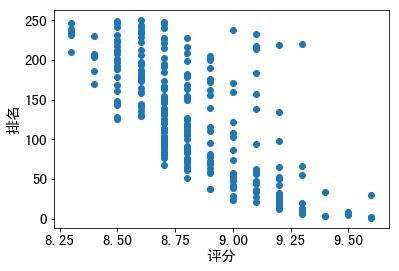

In [256]:
plt.scatter(data['score'], data['num']) #绘制散点图
plt.xlabel('评分')    #x轴标签
plt.ylabel('排名')  #y轴标签
plt.show()

*** 优化 ***
- 但上图看着还是有些别扭，因为我们习惯了排名靠前的在 y 轴的上方
- 可以用 invert_yaxis() 函数来改变 y 轴标签的顺序
- 重构可视化显示

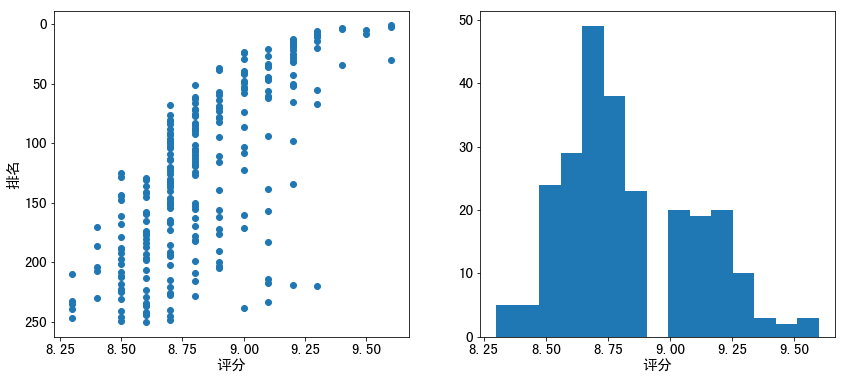

In [258]:
# 优化
plt.figure(figsize=(14,6)) 
plt.subplot(1,2,1)
plt.scatter(data['score'], data['num'])
plt.xlabel('评分')
plt.ylabel('排名')
# plt.gca():返回当前axes
# invert_yaxis()：反转y轴标签的顺序。
plt.gca().invert_yaxis()

# 绘制直方图
plt.subplot(1,2,2)
plt.hist(data['score'],bins = 15)
plt.xlabel('评分')
plt.show()

#### 利用“皮尔逊相关系数” 显示相关性

In [261]:
data['num'].corr(data['score'])

-0.716814591635897

*** 结论 *** 
- 排名越靠前，即num值越小，平均评分越高
- 豆瓣电影评分大多是集中在 8.3 - 9.2 之间，随评分的升高，豆瓣电影Top250排名名次大致提前
- Pearson相关系数为 -0.7168 ，呈强相关性

## 4.2、排名与评论人数的关系-可视化分析 


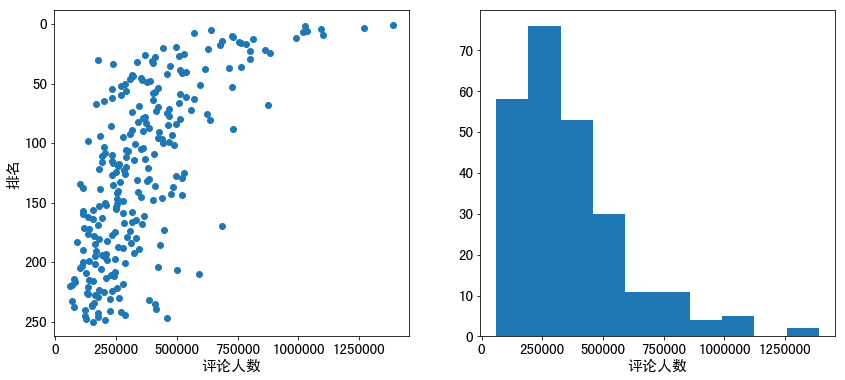

In [263]:
plt.figure(figsize=(14,6)) 
plt.subplot(1,2,1)
plt.scatter(data['commentors'], data['num'])
plt.xlabel('评论人数')
plt.ylabel('排名')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.hist(data['commentors'])
plt.xlabel('评论人数')
plt.show()

#### 利用“皮尔逊相关系数” 显示相关性

In [264]:
data['num'].corr(data['commentors'])

-0.6724469232123699

*** 结论 ***
- 评价人数呈右偏分布，随评价人数的增多，豆瓣电影Top250排名名次有提前趋势
- Pearson相关系数为 -0.6724 ，呈强相关性

## 4.3、排名与电影时长的关系-可视化分析

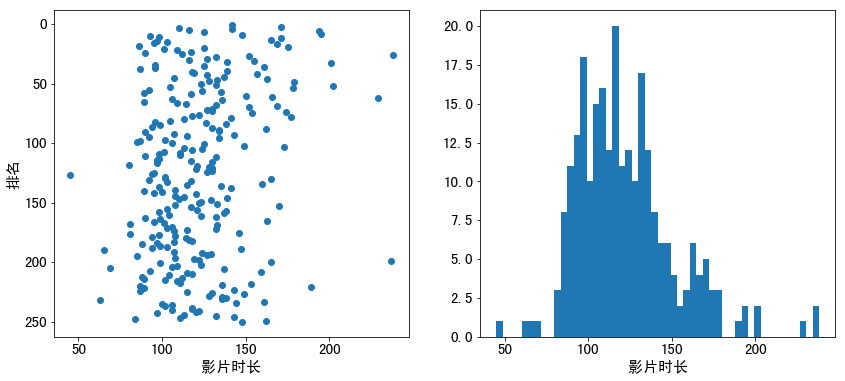

In [266]:
plt.figure(figsize=(14,6)) 
plt.subplot(1,2,1)
plt.scatter(data['runtime'], data['num'])
plt.xlabel('影片时长')
plt.ylabel('排名')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.hist(data['runtime'],bins = 50)
plt.xlabel('影片时长')
plt.show()

#### 利用“皮尔逊相关系数” 显示相关性

In [268]:
data['num'].corr(data['runtime'])

-0.21607221278080543

*** 结论 *** 
- 电影时长多数集中在 80-120 分钟之间,与豆瓣电影Top250排名之间关系不大
- Pearson相关系数为 -0.2160 ，为弱相关性

## 4.4、排名与上映年份的关系-可视化分析

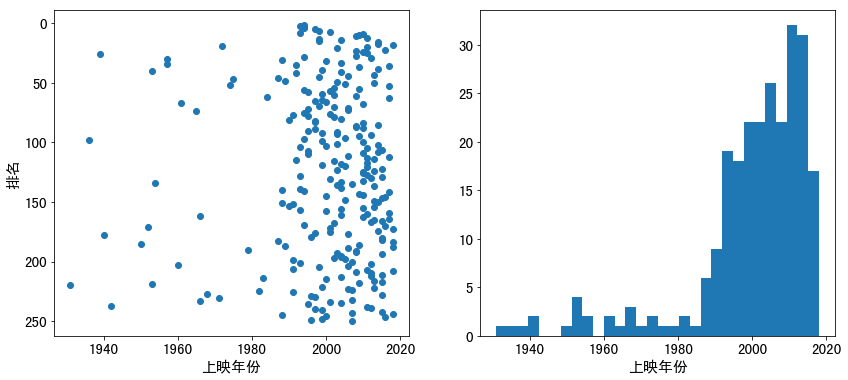

In [270]:
plt.figure(figsize=(14,6)) 
plt.subplot(1,2,1)
plt.scatter(data['releasedate'], data['num'])
plt.xlabel('上映年份')
plt.ylabel('排名')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.hist(data['releasedate'],bins = 30)
plt.xlabel('上映年份')
plt.show()

#### 利用“皮尔逊相关系数” 显示相关性

In [271]:
data['num'].corr(data['releasedate'])

0.002544143190287347

*** 结论 *** 
- 1990年之后电影上映处于一个突然激增状态，这也可能与人们生活水平提高有关系
- pearson相关系数为 0.0025 ，与豆瓣电影Top250排名没有相关性

## 4.5、国家/地区 电影top250排名统计-可视化分析


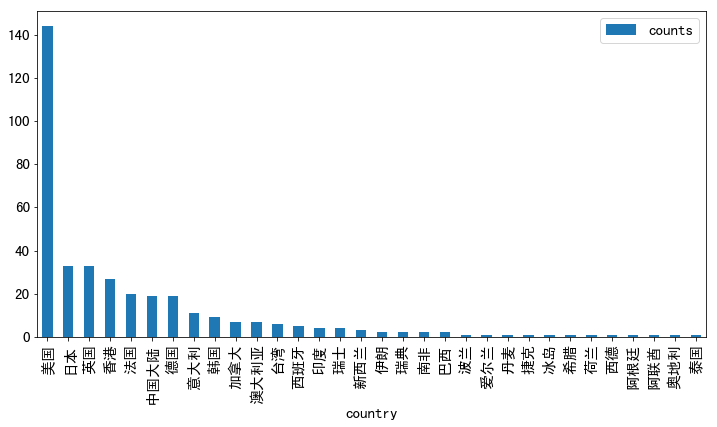

In [276]:
country_c.sort_values(by = 'counts',ascending = False).plot(kind ='bar', figsize = (12,6))
plt.show()

*** 结论 *** 
- 上榜电影中，美国电影数量最多，中国大陆排第6位

## 4.6、电影语言排名统计-可视化分析

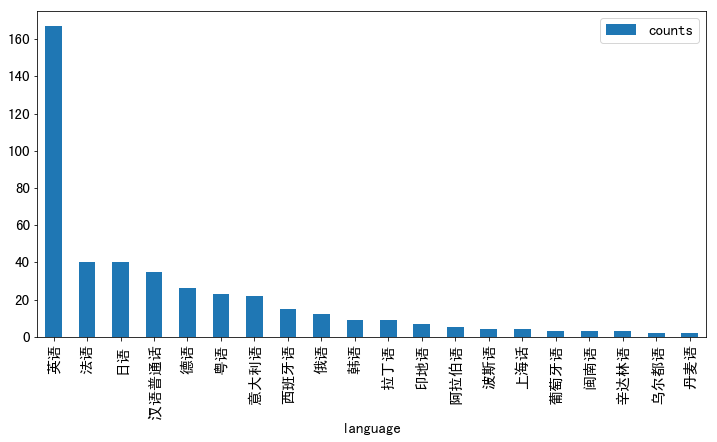

In [281]:
# 列出前20常见语言
language_c.sort_values(by = 'counts',ascending = False)[:20].plot(kind ='bar', figsize = (12,6))
plt.show()

*** 结论 *** 
- 上榜电影使用最多的语言为英语，汉语普通话排第4位

## 4.7、电影类型排名统计-可视化分析

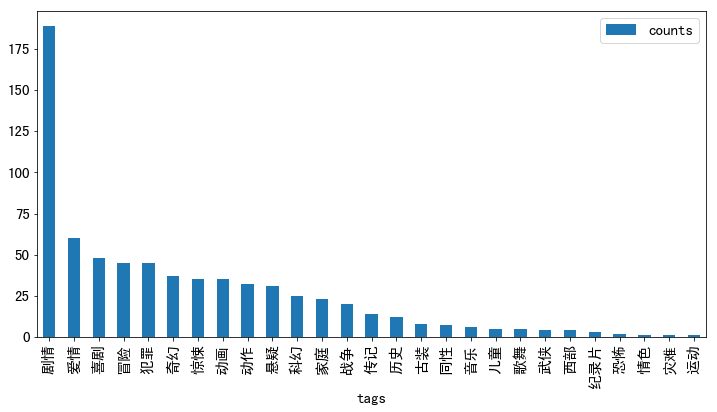

In [282]:
series_c.sort_values(by = 'counts',ascending = False).plot(kind ='bar', figsize = (12,6))
plt.show()

*** 结论 *** 
- 最多的电影类型是剧情，其次是爱情，这应该是剧情更能触动人的内心

# 五、可视化数据分析（PyEcharts版）

## 5.1、数据可视化分析-电影类型排名统计

In [314]:
from pyecharts import Bar
dat = series_c.sort_values(by = 'counts',ascending = False).reset_index()
attr = dat['tags'].tolist()
v1 = dat['counts'].tolist()

bar = Bar("电影类型排名统计")
bar.add("电影类型", attr, v1,xaxis_rotate=45)
bar

## 5.2、数据可视化分析-按评分占比统计

In [351]:
from pyecharts import Pie
Top10_score_num = data[['score','title']].sort_values(by = ['score'],ascending = False).head(10).reset_index()

attrs = Top10_score_num['title'].tolist()
v1 = Top10_score_num['score'].tolist()

pie = Pie("排名前10电影占比",title_pos='center')
pie.add("", attrs, v1, is_label_show=True,legend_orient='vertical',legend_pos='left')
pie


## 5.3、国家地区电影排名统计-可视化分析

In [355]:
from pyecharts import Line

country = country_c.reset_index()
v1 = country['counts'].tolist()
attr = country['country'].tolist()

line = Line("国家地区电影排名")
line.add("国家", attr, v1, mark_point=["min","max"],is_smooth=True, mark_line=["max", "average"],xaxis_rotate=90)
line

## 5.3、电影标签热度词云统计-可视化分析

In [393]:
#词云图
from pyecharts import WordCloud
import numpy as np
import jieba

name=series_c.index
value=series_c.values

wordcloud=WordCloud(width=800,height=400)
wordcloud.add('',name,value,word_size_range=[20,100])
wordcloud.render('豆瓣电影TOP250词云图.html')
wordcloud

# 六、数据分析结论：
- 豆瓣电影Top250排行榜和电影评分及评论人数有强相关性，和上映时间无相关性
- 剧情、爱情、喜剧、犯罪、冒险类型的电影上榜较多，常用标签为“美国”、“剧情”、“经典”、“人性”、“爱情” 
- 美国的电影最受欢迎，用的最多的语言是英语
- 上榜次数最多的导演是“克里斯托弗·诺兰”和“宫崎骏”，同为7次
- 上榜次数最多的主演是“张国荣”，高达8次
- 片长和排名关系不大，多数集中在80-120之间